In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/content/drive/MyDrive/intership/Cust_Segmentation (3).csv")

In [4]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [7]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [11]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [12]:
df["Defaulted"].mode()

0    0.0
dtype: float64

0      NBA001
1      NBA021
2      NBA013
3      NBA009
4      NBA008
        ...  
845    NBA007
846    NBA002
847    NBA001
848    NBA012
849    NBA025
Name: Address, Length: 850, dtype: object

In [15]:
df.drop(['Address', 'Customer Id'], inplace = True,axis = 1)

In [16]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [18]:
from sklearn.impute import SimpleImputer
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [19]:
df["Defaulted"] = imputer_str.fit_transform(df[["Defaulted"]])

In [21]:
df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

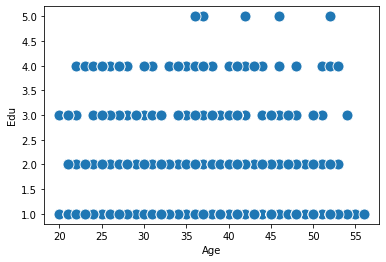

In [25]:
sns.scatterplot(x=df["Age"],
            y=df["Edu"],
            s=120)

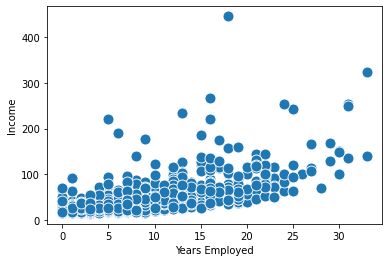

In [26]:
sns.scatterplot(x=df["Years Employed"],
            y=df["Income"],
            s=120)

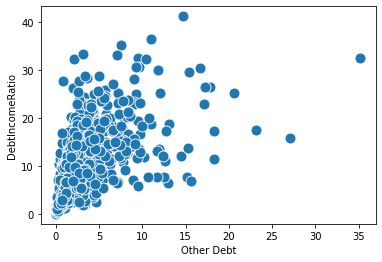

In [27]:
sns.scatterplot(x=df["Other Debt"],
            y=df["DebtIncomeRatio"],
            s=120)

In [31]:
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [32]:
X=df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio']]
print(X.head())
print(X.shape)

   Age  Edu  Years Employed  Income  Card Debt  Other Debt  Defaulted  \
0   41    2               6      19      0.124       1.073        0.0   
1   47    1              26     100      4.582       8.218        0.0   
2   33    2              10      57      6.111       5.802        1.0   
3   29    2               4      19      0.681       0.516        0.0   
4   47    1              31     253      9.308       8.908        0.0   

   DebtIncomeRatio  
0              6.3  
1             12.8  
2             20.9  
3              6.3  
4              7.2  
(850, 8)


In [33]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
model=model.fit(X)

In [34]:
model.cluster_centers_

array([[4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01],
       [3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00]])

In [35]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [36]:
y_preds = model.predict(X)
y_preds

array([1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

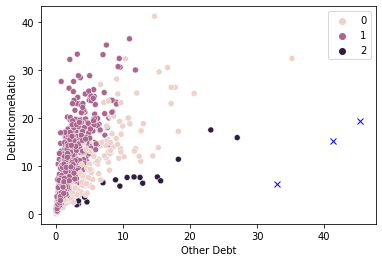

In [40]:
sns.scatterplot(data=X, x='Other Debt', y='DebtIncomeRatio', hue=y_preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')